# Predictive Modeling Project

## Problem 1: Linear Regression

**PROBLEM STATEMENT :** You are hired by a company Gem Stones co ltd, which is a cubic zirconia manufacturer. You are provided with the dataset containing the prices and other attributes of almost 27,000 cubic zirconia (which is an inexpensive diamond alternative with many of the same qualities as a diamond). The company is earning different profits on different prize slots. 

The goal of the problem is as follows:
- You have to help the company in predicting the price for the stone on the basis of the details given in the dataset, so it can distinguish between higher profitable stones and lower profitable stones so as to have better profit share. 
- Also, provide them with the best 5 attributes that are most important.

**Data Dictionary:**
(Variable Name: Description)
1. **Carat:** Carat weight of the cubic zirconia
2. **Cut:** Describe the cut quality of the cubic zirconia. Quality is increasing order Fair, Good, Very Good, Premium, Ideal.
3. **Color:** 	 Colour of the cubic zirconia.With D being the best and J the worst.
4. **Clarity:**	 cubic zirconia Clarity refers to the absence of the Inclusions and Blemishes.(In order from Best to Worst, FL = flawless, I3= level 3 inclusions) FL, IF, VVS1, VVS2, VS1, VS2, SI1, SI2, I1, I2, I3
5. **Depth:**	The Height of a cubic zirconia, measured from the Culet to the table, divided by its average Girdle Diameter.
6. **Table:** The Width of the cubic zirconia's Table expressed as a Percentage of its Average Diameter.
7. **Price:** The Price of the cubic zirconia.
8. **X:** Length of the cubic zirconia in mm.
9. **Y:** Width of the cubic zirconia in mm.
10. **Z:** Height of the cubic zirconia in mm.

**Questions to address**
- 1.1. Read the data and do exploratory data analysis. Describe the data briefly. (Check the null values, Data types, shape, EDA). Perform Univariate and Bivariate Analysis.
- 1.2 Impute null values if present, also check for the values which are equal to zero. Do they have any meaning or do we need to change them or drop them? Do you think scaling is necessary in this case?
- 1.3 Encode the data (having string values) for Modelling. Data Split: Split the data into train and test (70:30). Apply Linear regression. Performance Metrics: Check the performance of Predictions on Train and Test sets using Rsquare, RMSE.
- 1.4 Inference: Basis on these predictions, what are the business insights and recommendations.

#### Import the basic libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn import tree
from sklearn.ensemble import RandomForestRegressor
from sklearn.neural_network import MLPRegressor
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.model_selection import GridSearchCV

**Read the dataset**

In [2]:
df = pd.read_csv("cubic_zirconia-1.csv")
df.head()

,Unnamed: 0,carat,cut,color,clarity,depth,table,x,y,z,price
0,1,0.30,Ideal,E,SI1,62.1,58.0,4.27,4.29,2.66,499
1,2,0.33,Premium,G,IF,60.8,58.0,4.42,4.46,2.70,984
2,3,0.90,Very Good,E,VVS2,62.2,60.0,6.04,6.12,3.78,6289
3,4,0.42,Ideal,F,VS1,61.6,56.0,4.82,4.80,2.96,1082
4,5,0.31,Ideal,F,VVS1,60.4,59.0,4.35,4.43,2.65,779


In [3]:
df.drop(df.columns[0], axis = 1, inplace=True)
df.head()

,carat,cut,color,clarity,depth,table,x,y,z,price
0,0.30,Ideal,E,SI1,62.1,58.0,4.27,4.29,2.66,499
1,0.33,Premium,G,IF,60.8,58.0,4.42,4.46,2.70,984
2,0.90,Very Good,E,VVS2,62.2,60.0,6.04,6.12,3.78,6289
3,0.42,Ideal,F,VS1,61.6,56.0,4.82,4.80,2.96,1082
4,0.31,Ideal,F,VVS1,60.4,59.0,4.35,4.43,2.65,779


In [400]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26967 entries, 0 to 26966
Data columns (total 10 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   carat    26967 non-null  float64
 1   cut      26967 non-null  object 
 2   color    26967 non-null  object 
 3   clarity  26967 non-null  object 
 4   depth    26270 non-null  float64
 5   table    26967 non-null  float64
 6   x        26967 non-null  float64
 7   y        26967 non-null  float64
 8   z        26967 non-null  float64
 9   price    26967 non-null  int64  
dtypes: float64(6), int64(1), object(3)
memory usage: 2.1+ MB


In [401]:
df.shape

(26967, 10)

**Statistical Summary**

In [314]:
df.describe(include='all')

,carat,cut,color,clarity,depth,table,x,y,z,price
count,26967.000000,26967,26967,26967,26270.000000,26967.000000,26967.000000,26967.000000,26967.000000,26967.000000
unique,NaN,5,7,8,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,Ideal,G,SI1,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,10816,5661,6571,NaN,NaN,NaN,NaN,NaN,NaN
mean,0.798375,NaN,NaN,NaN,61.745147,57.456080,5.729854,5.733569,3.538057,3939.518115
std,0.477745,NaN,NaN,NaN,1.412860,2.232068,1.128516,1.166058,0.720624,4024.864666
min,0.200000,NaN,NaN,NaN,50.800000,49.000000,0.000000,0.000000,0.000000,326.000000
25%,0.400000,NaN,NaN,NaN,61.000000,56.000000,4.710000,4.710000,2.900000,945.000000
50%,0.700000,NaN,NaN,NaN,61.800000,57.000000,5.690000,5.710000,3.520000,2375.000000
75%,1.050000,NaN,NaN,NaN,62.500000,59.000000,6.550000,6.540000,4.040000,5360.000000


**Missing Value Check**

In [4]:
df.isnull().sum()

carat        0
cut          0
color        0
clarity      0
depth      697
table        0
x            0
y            0
z            0
price        0
dtype: int64

**Percentage of missing values from column 'depth'**

In [406]:
mv = df['depth'].isnull().sum()*100/len(df['depth'])
print('missing value from column is ', mv.round(2), '%')

missing value from column is  2.58 %


Comment: As the missing value percentage is less than 3%. Hence. we won't drop the 'depth' column. Rather, we will impute the missing values in column.

But, first we will check the duplicates and values which are zero.

**Replacing 0 values with NAN**

In [5]:
# getting all the rows which have zeros
mylist = ['x','y','z']
df[df[mylist].eq(0).all(1)]

,carat,cut,color,clarity,depth,table,x,y,z,price
5821,0.71,Good,F,SI2,64.1,60.0,0.0,0.0,0.0,2130
6215,0.71,Good,F,SI2,64.1,60.0,0.0,0.0,0.0,2130
17506,1.14,Fair,G,VS1,57.5,67.0,0.0,0.0,0.0,6381


In [6]:
df = df.replace(0, pd.np.nan)
display(df.loc[[5821,6215,17506],:])

<ipython-input-6-07de098e6f04>:1: FutureWarning: The pandas.np module is deprecated and will be removed from pandas in a future version. Import numpy directly instead
  df = df.replace(0, pd.np.nan)


,carat,cut,color,clarity,depth,table,x,y,z,price
5821,0.71,Good,F,SI2,64.1,60.0,NaN,NaN,NaN,2130
6215,0.71,Good,F,SI2,64.1,60.0,NaN,NaN,NaN,2130
17506,1.14,Fair,G,VS1,57.5,67.0,NaN,NaN,NaN,6381


Comment:Now 0 values are replaced by NaN. A complete list of the values of dimension is missing here. If we will impute with the mean value of whole column then it will not make the justice. Rather either we should impute it with the mean value for all the values for same carat, cut, color and clarity, orelse we can drop these rows altogether.

Here, we are dropping it as the number of such rows is less hence impact should be negligible.

In [7]:
print('shape before drop', df.shape)
df.drop([df.index[5821] , df.index[6215], df.index[17506]], inplace=True)
print('shape after drop', df.shape)

shape before drop (26967, 10)
shape after drop (26964, 10)


**Checking Duplicates**

In [410]:
df.duplicated().sum()

33

In [8]:
print('Before',df.shape)
df.drop_duplicates(inplace=True)
print('After',df.shape)

Before (26964, 10)
After (26931, 10)


Comment: after dropping the duplicates, now we have 26931 rows.

**Converting Object type data** 

In [9]:
df.select_dtypes(include='object').head()

,cut,color,clarity
0,Ideal,E,SI1
1,Premium,G,IF
2,Very Good,E,VVS2
3,Ideal,F,VS1
4,Ideal,F,VVS1


**Finding all the unique values from categorical variables**

In [10]:
for column in df.columns:
    if df[column].dtype == 'object':
        print(column.upper(),': ',df[column].nunique())
        print(df[column].value_counts().sort_values())
        print('\n')

CUT :  5
Fair           779
Good          2434
Very Good     6027
Premium       6886
Ideal        10805
Name: cut, dtype: int64


COLOR :  7
J    1440
I    2765
D    3341
H    4095
F    4722
E    4916
G    5652
Name: color, dtype: int64


CLARITY :  8
I1       364
IF       891
VVS1    1839
VVS2    2530
VS1     4086
SI2     4563
VS2     6093
SI1     6565
Name: clarity, dtype: int64




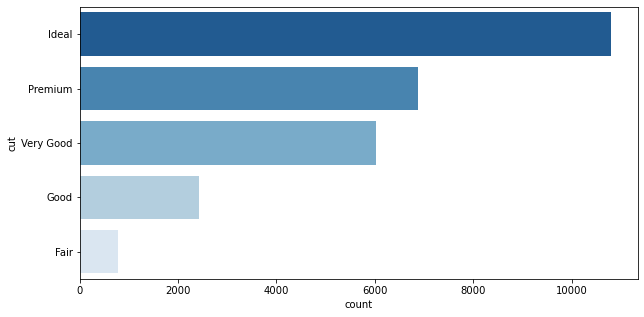

In [326]:
plt.figure(figsize=(10,5))
sns.countplot(y=(df.cut), palette='Blues_r');

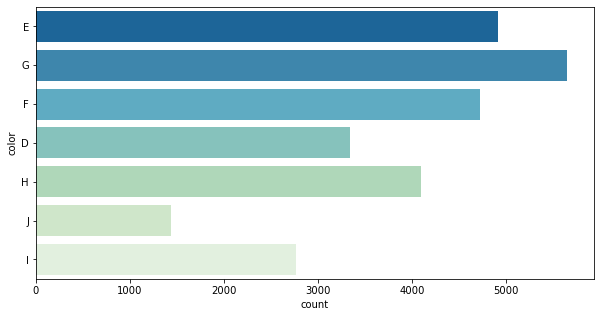

In [327]:
plt.figure(figsize=(10,5))
sns.countplot(y=(df.color), palette='GnBu_r');

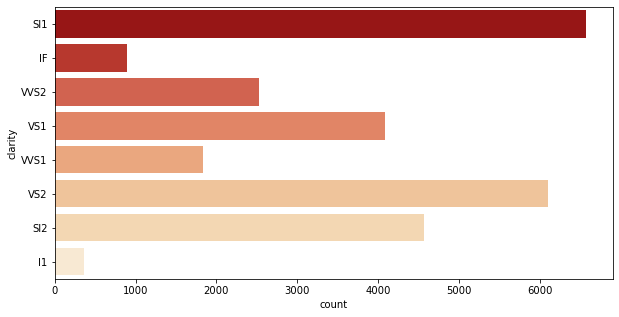

In [331]:
plt.figure(figsize=(10,5))
sns.countplot(y=(df.clarity), palette='OrRd_r');

### Bivariate analysis
**Pairplot of continious variable data**

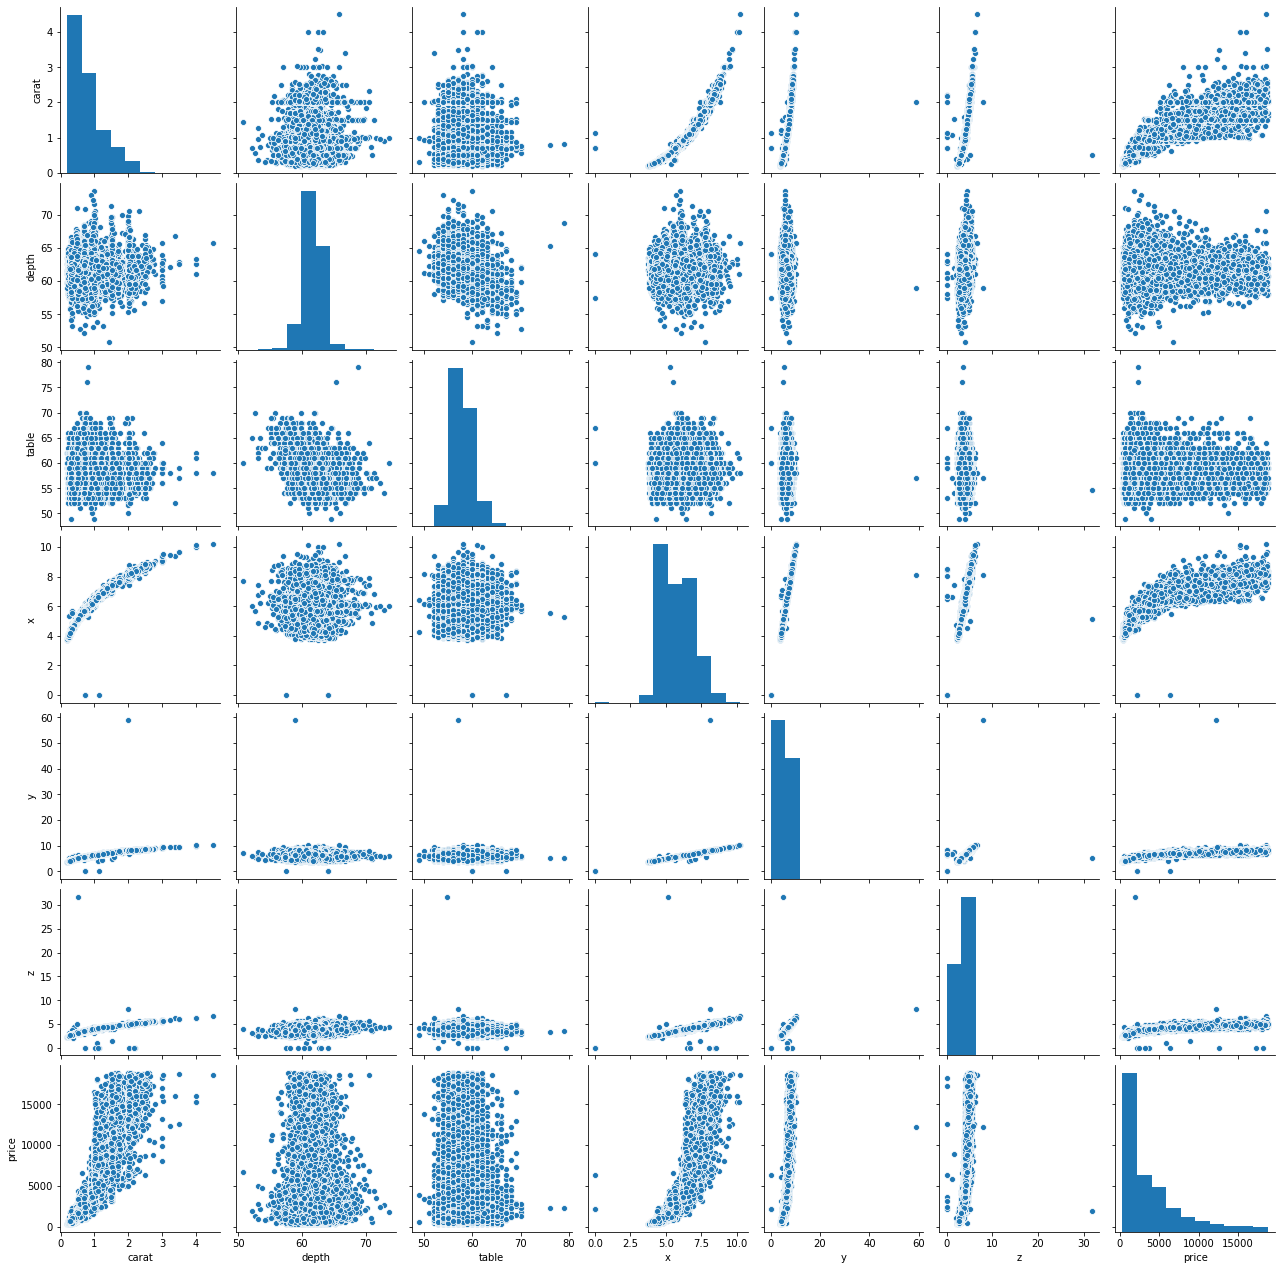

In [7]:
sns.pairplot(df);

**Converting categorical to numeric codes**

using numeric encoding insteading of hot-encoding to avoid high-dimentionality

In [11]:
for feature in df.columns: 
    if df[feature].dtype == 'object': 
        print('\n')
        print('feature:',feature)
        print(pd.Categorical(df[feature].unique()))
        print(pd.Categorical(df[feature].unique()).codes)
        df[feature] = pd.Categorical(df[feature]).codes



feature: cut
[Ideal, Premium, Very Good, Good, Fair]
Categories (5, object): [Fair, Good, Ideal, Premium, Very Good]
[2 3 4 1 0]


feature: color
[E, G, F, D, H, J, I]
Categories (7, object): [D, E, F, G, H, I, J]
[1 3 2 0 4 6 5]


feature: clarity
[SI1, IF, VVS2, VS1, VVS1, VS2, SI2, I1]
Categories (8, object): [I1, IF, SI1, SI2, VS1, VS2, VVS1, VVS2]
[2 1 7 4 6 5 3 0]


In [415]:
df.head()

,carat,cut,color,clarity,depth,table,x,y,z,price
0,0.30,2,1,2,62.1,58.0,4.27,4.29,2.66,499
1,0.33,3,3,1,60.8,58.0,4.42,4.46,2.70,984
2,0.90,4,1,7,62.2,60.0,6.04,6.12,3.78,6289
3,0.42,2,2,4,61.6,56.0,4.82,4.80,2.96,1082
4,0.31,2,2,6,60.4,59.0,4.35,4.43,2.65,779


**Imputing missing values**

In [12]:
for column in df.columns:
    if df[column].dtype != 'object':
        mean = df[column].mean()
        df[column] = df[column].fillna(mean)    
        
df.isnull().sum()

carat      0
cut        0
color      0
clarity    0
depth      0
table      0
x          0
y          0
z          0
price      0
dtype: int64

Comment:after imputation, no missing values are present.

In [417]:
df.describe(include='all').round(2)

,carat,cut,color,clarity,depth,table,x,y,z,price
count,26931.00,26931.00,26931.00,26931.00,26931.00,26931.00,26931.00,26931.00,26931.00,26931.00
mean,0.80,2.56,2.61,3.83,61.75,57.46,5.73,5.73,3.54,3937.50
std,0.48,1.02,1.71,1.73,1.39,2.23,1.13,1.16,0.72,4022.66
min,0.20,0.00,0.00,0.00,50.80,49.00,3.73,3.71,1.07,326.00
25%,0.40,2.00,1.00,2.00,61.10,56.00,4.71,4.72,2.90,945.00
50%,0.70,2.00,3.00,4.00,61.80,57.00,5.69,5.70,3.52,2375.00
75%,1.05,3.00,4.00,5.00,62.50,59.00,6.55,6.54,4.04,5355.50
max,4.50,4.00,6.00,7.00,73.60,79.00,10.23,58.90,31.80,18818.00


**Correlation Plot**

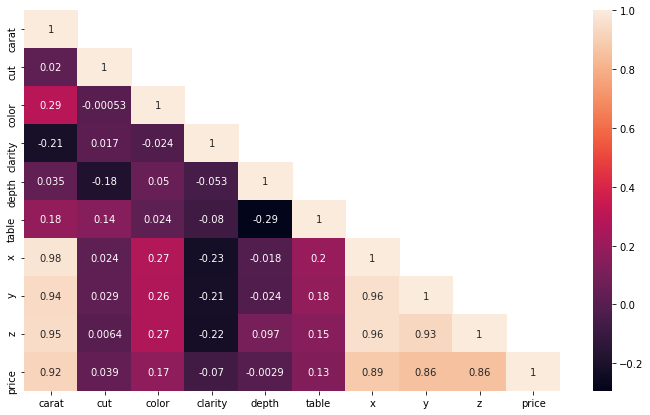

In [13]:
plt.figure(figsize=(12,7))
sns.heatmap(df.corr(), annot=True,mask=np.triu(df.corr(),+1));
plt.show()

Comment: High correlation between Price and carat,x,y,z shows that the price highly depends on the weight and dimension of zirconia diamond.

**Checking Outliers**

Shape before Outliers Treatment (26933, 10)


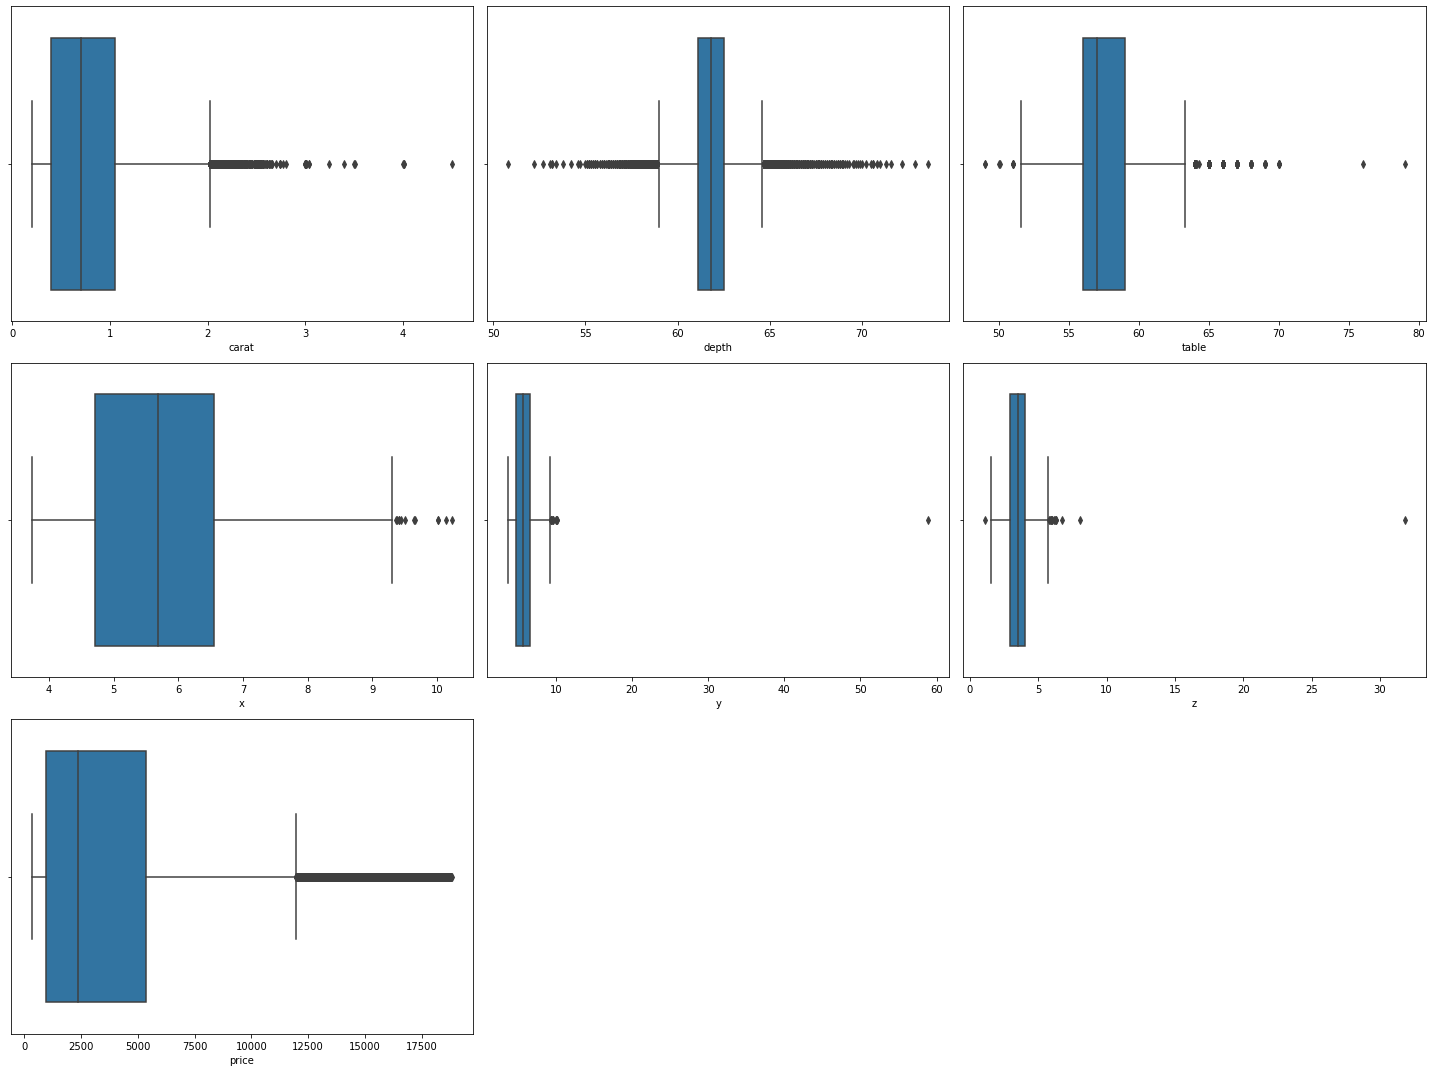

In [14]:
data_plot=df[['carat','depth','table','x','y','z','price']]
fig=plt.figure(figsize=(20,15));
for i in range(0,len(data_plot.columns)):
    ax=fig.add_subplot(3,3,i+1)
    sns.boxplot(data_plot[data_plot.columns[i]])
    plt.tight_layout()
print('Shape before Outliers Treatment',df.shape)

**Comment:** The boxplot shows that the outlier treatment is required.

**Outlier Teatment**

In [13]:
def remove_outlier(col):
    sorted(col)
    Q1,Q3=np.percentile(col,[25,75])
    IQR=Q3-Q1
    lower_range= Q1-(1.5 * IQR)
    upper_range= Q3+(1.5 * IQR)
    return lower_range, upper_range

In [14]:
#remove the extreme outliers from variables
var = ['carat','depth','table','x','y','z','price']
for i in range(0,7):
    lr,ur = remove_outlier(df[var[i]])
    df[var[i]] =np.where(df[var[i]]>ur,ur,df[var[i]])
    df[var[i]] =np.where(df[var[i]]<lr,lr,df[var[i]])

Shape after Outliers Treatment (26931, 10)


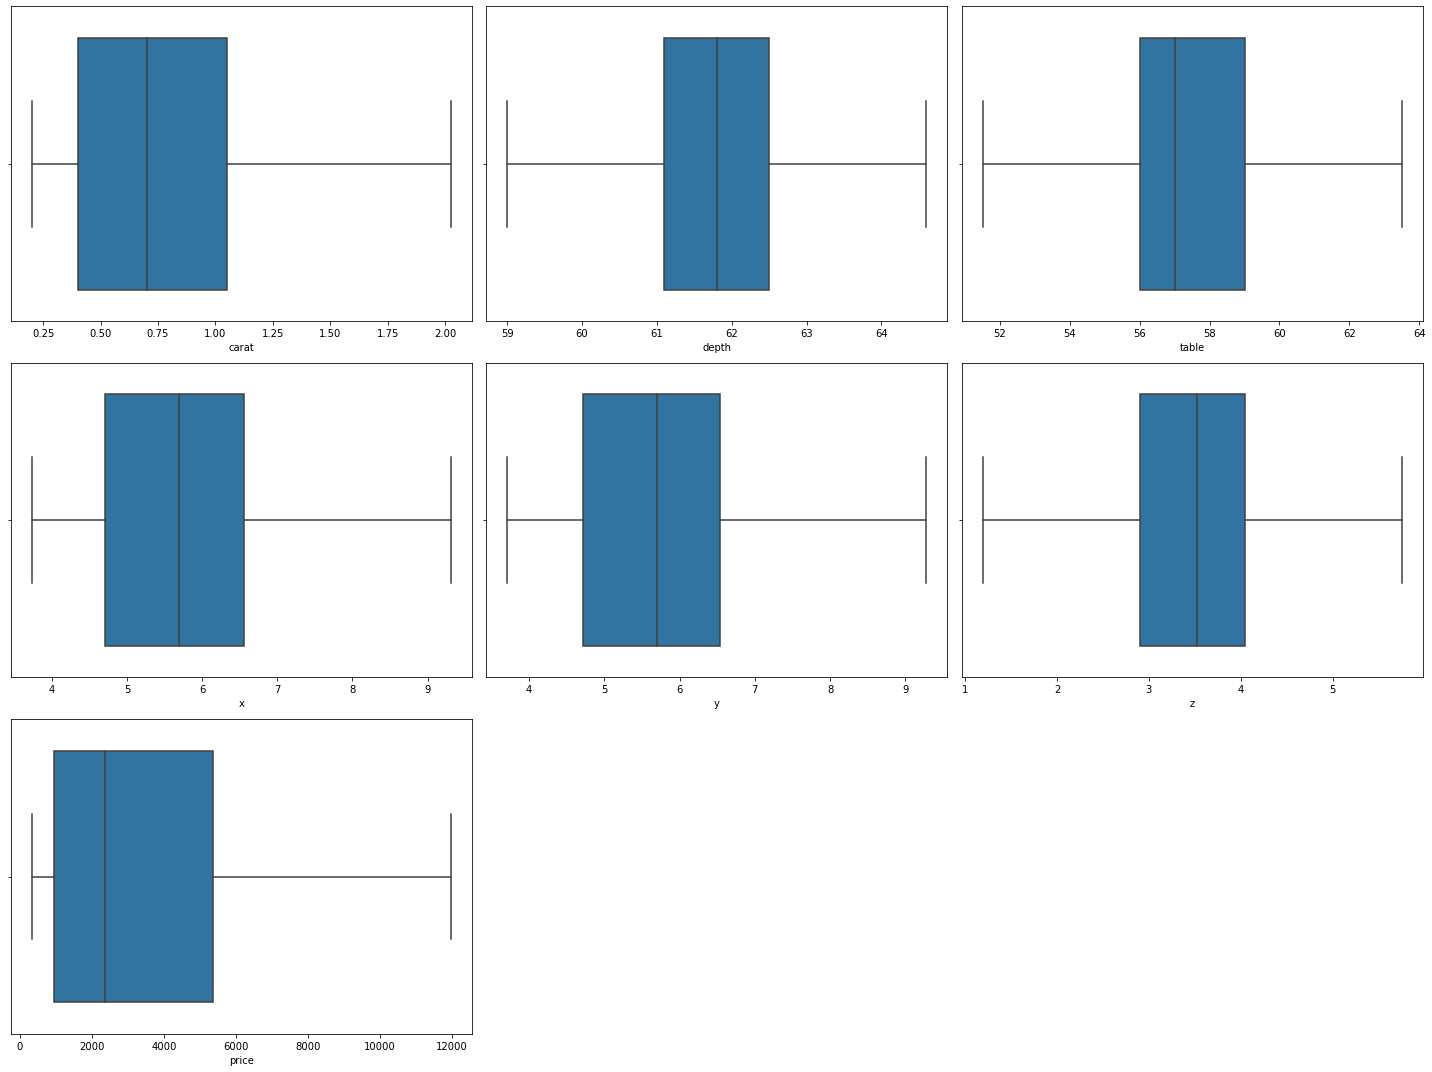

In [15]:
data_plot=df[['carat','depth','table','x','y','z','price']]
fig=plt.figure(figsize=(20,15));
for i in range(0,len(data_plot.columns)):
    ax=fig.add_subplot(3,3,i+1)
    sns.boxplot(data_plot[data_plot.columns[i]])
    plt.tight_layout()
print('Shape after Outliers Treatment',df.shape)

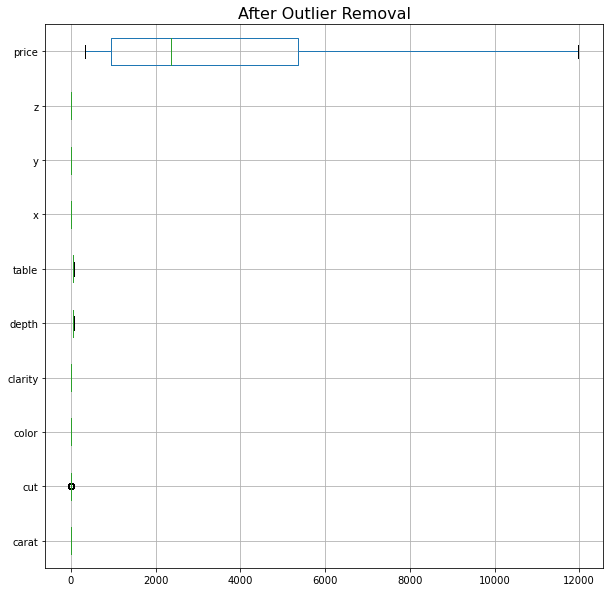

In [19]:
plt.figure(figsize=(10,10))
df.boxplot(vert=0)
plt.title('After Outlier Removal',fontsize=16)
plt.show()

Comment: For linear regression where we are trying to find co-relation between the variables, we can miss the scaling as the Rsqaure, etc factors will not differ.

**Splitting the data**

In [16]:
# Copy all the predictor variables into X dataframe
X = df.drop('price', axis=1)

# Copy target into the y dataframe. 
y = df[['price']]

In [17]:
# Split X and y into training and test set in 70:30 ratio
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3 , random_state=1)

In [18]:
print('Number of rows and columns of the training set for the independent variables:',X_train.shape)
print('Number of rows and columns of the training set for the dependent variable:',y_train.shape)
print('Number of rows and columns of the test set for the independent variables:',X_test.shape)
print('Number of rows and columns of the test set for the dependent variable:',y_test.shape)

Number of rows and columns of the training set for the independent variables: (18851, 9)
Number of rows and columns of the training set for the dependent variable: (18851, 1)
Number of rows and columns of the test set for the independent variables: (8080, 9)
Number of rows and columns of the test set for the dependent variable: (8080, 1)


### Linear Regression Model

In [22]:
# invoke the LinearRegression function and finding bestfit model on training data

regression_model = LinearRegression()
regression_model.fit(X_train, y_train)

LinearRegression()

In [23]:
# explore the coefficients for each of the independent attributes

for idx, col_name in enumerate(X_train.columns):
    print("The coefficient for {} is {}".format(col_name, regression_model.coef_[0][idx]))

The coefficient for carat is 9268.406110432328
The coefficient for cut is 49.46567980453993
The coefficient for color is -233.3998023005333
The coefficient for clarity is 253.36227188983784
The coefficient for depth is -50.29464547077164
The coefficient for table is -73.3005407073891
The coefficient for x is -1858.1646029024328
The coefficient for y is 1728.8883716597911
The coefficient for z is -921.3474546937607


In [24]:
# Let us check the intercept for the model

intercept = regression_model.intercept_[0]

print("The intercept for our model is {}".format(intercept))

The intercept for our model is 7209.7845039278345


In [25]:
# R square on training data
regression_model.score(X_train, y_train)

0.9088629614307326

Comment: Almost 90% variation of price is predicted via model for training 

In [26]:
# R square on testing data
regression_model.score(X_test, y_test)

0.9120638159637292

Comment: Almost 91% variation of price is predicted via model for test

In [30]:
#RMSE on Training data
from sklearn import metrics
predicted_train=regression_model.fit(X_train, y_train).predict(X_train)
np.sqrt(metrics.mean_squared_error(y_train,predicted_train))

1046.2373354096526

In [31]:
#RMSE on Testing data
predicted_test=regression_model.fit(X_train, y_train).predict(X_test)
np.sqrt(metrics.mean_squared_error(y_test,predicted_test))

1030.1778397056005

In [32]:
# concatenate X and y into a single dataframe
data_train = pd.concat([X_train, y_train], axis=1)
data_test=pd.concat([X_test,y_test],axis=1)
data_train.head()

,carat,cut,color,clarity,depth,table,x,y,z,price
22114,0.34,4,4,5,62.4,60.0,4.41,4.44,2.76,537.0
2275,0.30,2,1,5,61.2,55.0,4.35,4.31,2.65,844.0
19183,0.50,2,3,2,62.5,57.0,5.09,5.05,3.17,1240.0
5030,1.10,1,1,3,63.3,56.0,6.53,6.58,4.15,4065.0
25414,1.02,3,2,3,61.1,62.0,6.54,6.49,3.98,4057.0


In [33]:
data_train.columns

Index(['carat', 'cut', 'color', 'clarity', 'depth', 'table', 'x', 'y', 'z',
       'price'],
      dtype='object')

In [34]:
expr= 'price ~ carat + cut + color + clarity + depth + table + x + y + z'

In [35]:
import statsmodels.formula.api as smf
lm1 = smf.ols(formula= expr, data = data_train).fit()
lm1.params

Intercept    7209.784504
carat        9268.406110
cut            49.465680
color        -233.399802
clarity       253.362272
depth         -50.294645
table         -73.300541
x           -1858.164603
y            1728.888372
z            -921.347455
dtype: float64

In [36]:
print(lm1.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.909
Model:                            OLS   Adj. R-squared:                  0.909
Method:                 Least Squares   F-statistic:                 2.088e+04
Date:                Mon, 15 Feb 2021   Prob (F-statistic):               0.00
Time:                        20:03:10   Log-Likelihood:            -1.5784e+05
No. Observations:               18853   AIC:                         3.157e+05
Df Residuals:                   18843   BIC:                         3.158e+05
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   7209.7845    849.985      8.482      0.0

In [457]:
# Calculate MSE
mse = np.mean((lm1.predict(data_train.drop('price',axis=1))-data_train['price'])**2)

In [458]:
#Root Mean Squared Error - RMSE
np.sqrt(mse)

1042.7520504012437

In [459]:
np.sqrt(lm1.mse_resid) #another way

1043.0287378713947

In [460]:
# Prediction on Test data
y_pred = lm1.predict(data_test)

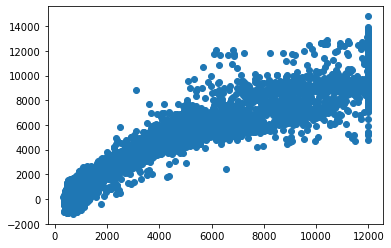

In [462]:
plt.scatter(y_test['price'], y_pred)
plt.show()

In [463]:
for i,j in np.array(lm1.params.reset_index()):
    print('({}) * {} +'.format(round(j,2),i),end=' ')

(7990.79) * Intercept + (9251.07) * carat + (43.47) * cut + (-225.91) * color + (251.0) * clarity + (-61.54) * depth + (-74.25) * table + (-1720.59) * x + (1529.34) * y + (-824.73) * z + 

In [37]:
# Prediction on Test data
y_pred = lm1.predict(data_test)

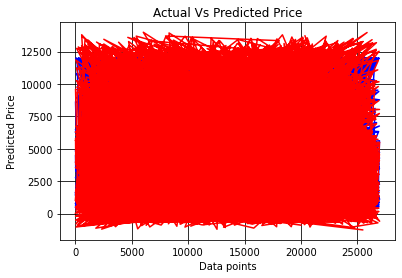

In [39]:
#plt.scatter(y_test['log_price'], y_pred)

plt.figure(figsize=(6,4))
plt.plot(y_test['price'],"blue")
plt.plot(y_pred,"red")
plt.title("Actual Vs Predicted Price")
plt.xlabel ("Data points")
plt.ylabel ("Predicted Price");
plt.grid(True, color ="k")
plt.style.use("fivethirtyeight")

### -------------------------------------------------------------------------------

## Problem 2: Logistic Regression and LDA

**PROBLEM STATEMENT:**

You are hired by a tour and travel agency which deals in selling holiday packages. You are provided details of 872 employees of a company. Among these employees, some opted for the package and some didn't. You have to help the company in predicting whether an employee will opt for the package or not on the basis of the information given in the data set. Also, find out the important factors on the basis of which the company will focus on particular employees to sell their packages.

Dataset for Problem 2: Holiday_Package.csv

**Data Dictionary:** (Variable Name: Description)

- 1. **Holiday_Package:** Opted for Holiday Package yes/no?
- 2. **Salary:** Employee salary
- 3. **age:** Age in years
- 4. **edu:** Years of formal education
- 5. **no_young_children:** The number of young children (younger than 7 years)
- 6. **no_older_children:** Number of older children
- 7. **foreign:** foreigner Yes/No

**Questions to address**
- 2.1 Data Ingestion: Read the dataset. Do the descriptive statistics and do null value condition check, write an inference on it. Perform Univariate and Bivariate Analysis. Do exploratory data analysis.
- 2.2 Do not scale the data. Encode the data (having string values) for Modelling. Data Split: Split the data into train and test (70:30). Apply Logistic Regression and LDA (linear discriminant analysis).
- 2.3 Performance Metrics: Check the performance of Predictions on Train and Test sets using Accuracy, Confusion Matrix, Plot ROC curve and get ROC_AUC score for each model Final Model: Compare Both the models and write inference which model is best/optimized.
- 2.4 Inference: Basis on these predictions, what are the insights and recommendations. Please explain and summarise the various steps performed in this project. There should be proper business interpretation and actionable insights present.


In [17]:
data=pd.read_csv('Holiday_Package-1.csv')
data.head()

,Unnamed: 0,Holliday_Package,Salary,age,educ,no_young_children,no_older_children,foreign
0,1,no,48412,30,8,1,1,no
1,2,yes,37207,45,8,0,1,no
2,3,no,58022,46,9,0,0,no
3,4,no,66503,31,11,2,0,no
4,5,no,66734,44,12,0,2,no


In [18]:
data.drop(data.columns[0], axis=1, inplace=True)
data.head()

,Holliday_Package,Salary,age,educ,no_young_children,no_older_children,foreign
0,no,48412,30,8,1,1,no
1,yes,37207,45,8,0,1,no
2,no,58022,46,9,0,0,no
3,no,66503,31,11,2,0,no
4,no,66734,44,12,0,2,no


In [43]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 872 entries, 0 to 871
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   Holliday_Package   872 non-null    object
 1   Salary             872 non-null    int64 
 2   age                872 non-null    int64 
 3   educ               872 non-null    int64 
 4   no_young_children  872 non-null    int64 
 5   no_older_children  872 non-null    int64 
 6   foreign            872 non-null    object
dtypes: int64(5), object(2)
memory usage: 47.8+ KB


In [45]:
data.describe(include='all').T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
Holliday_Package,872,2,no,471,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Salary,872,NaN,NaN,NaN,47729.2,23418.7,1322,35324,41903.5,53469.5,236961
age,872,NaN,NaN,NaN,39.9553,10.5517,20,32,39,48,62
educ,872,NaN,NaN,NaN,9.30734,3.03626,1,8,9,12,21
no_young_children,872,NaN,NaN,NaN,0.311927,0.61287,0,0,0,0,3
no_older_children,872,NaN,NaN,NaN,0.982798,1.08679,0,0,1,2,6
foreign,872,2,no,656,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [19]:
data.isnull().sum()

Holliday_Package     0
Salary               0
age                  0
educ                 0
no_young_children    0
no_older_children    0
foreign              0
dtype: int64

In [20]:
dups = data.duplicated()
print('Number of duplicate rows = %d' % (dups.sum()))

Number of duplicate rows = 0


In [21]:
data.Holliday_Package.value_counts(normalize=True)

no     0.540138
yes    0.459862
Name: Holliday_Package, dtype: float64

In [22]:
data.foreign.value_counts(normalize=True)

no     0.752294
yes    0.247706
Name: foreign, dtype: float64

In [23]:
#creating two set of dataset to model it without and with outlier treatment.
data2=data
data2.head()

,Holliday_Package,Salary,age,educ,no_young_children,no_older_children,foreign
0,no,48412,30,8,1,1,no
1,yes,37207,45,8,0,1,no
2,no,58022,46,9,0,0,no
3,no,66503,31,11,2,0,no
4,no,66734,44,12,0,2,no


Shape before Outliers Treatment (872, 7)


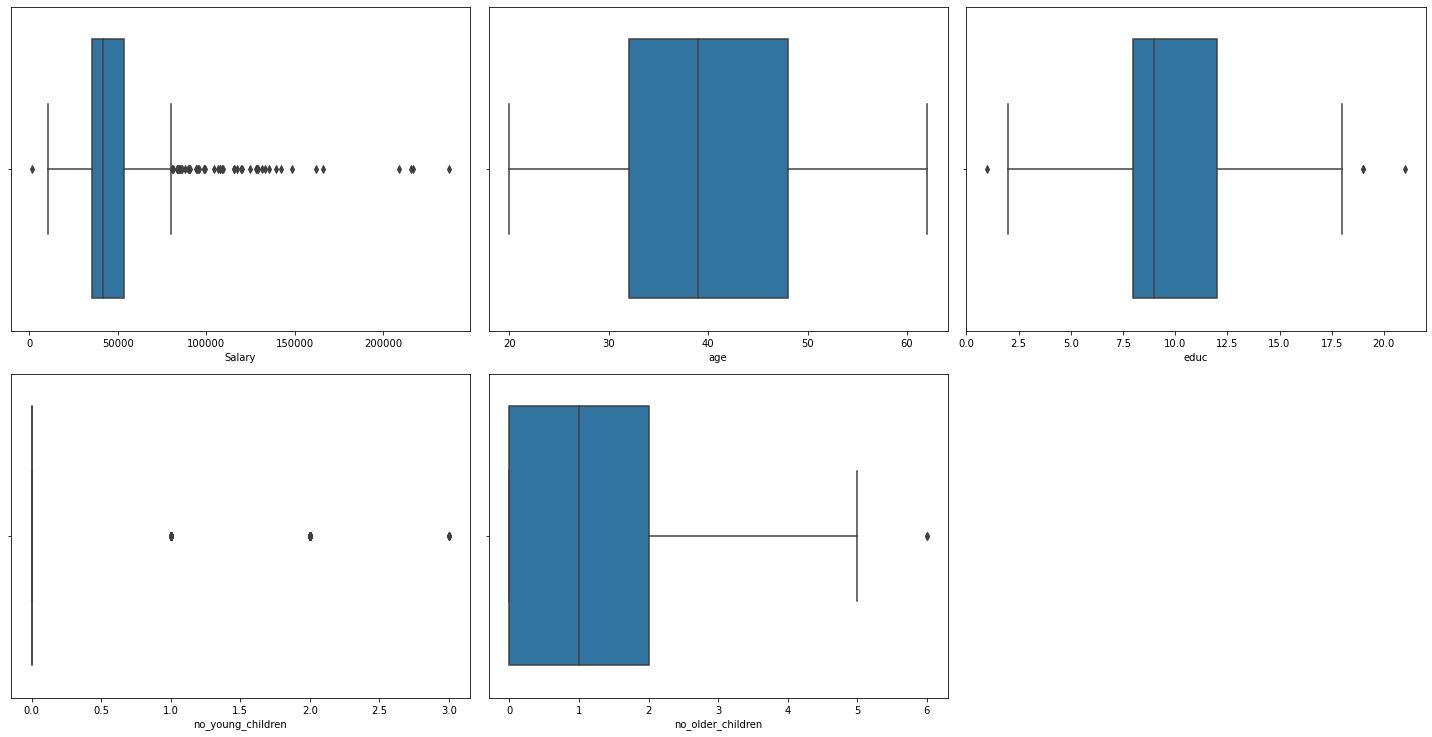

In [129]:
data_plot=data[['Salary','age','educ','no_young_children','no_older_children']]
fig=plt.figure(figsize=(20,15));
for i in range(0,len(data_plot.columns)):
    ax=fig.add_subplot(3,3,i+1)
    sns.boxplot(data_plot[data_plot.columns[i]])
    plt.tight_layout()
print('Shape before Outliers Treatment',data.shape)

**Checking Correlation**

In [130]:
data.corr()

,Salary,age,educ,no_young_children,no_older_children
Salary,1.000000,0.071709,0.326540,-0.029664,0.113772
age,0.071709,1.000000,-0.149294,-0.519093,-0.116205
educ,0.326540,-0.149294,1.000000,0.098350,-0.036321
no_young_children,-0.029664,-0.519093,0.098350,1.000000,-0.238428
no_older_children,0.113772,-0.116205,-0.036321,-0.238428,1.000000


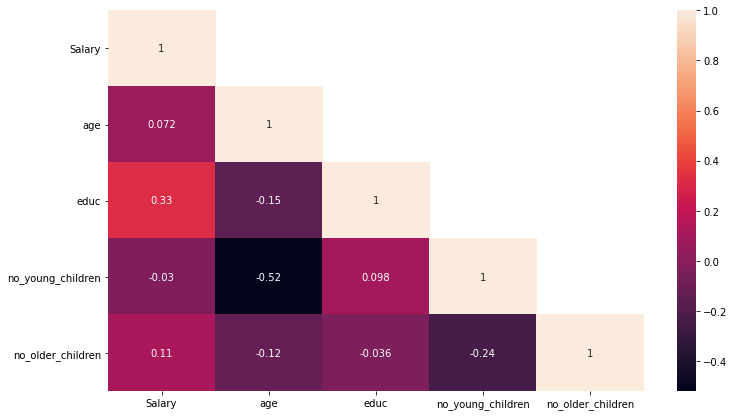

In [24]:
plt.figure(figsize=(12,7))
sns.heatmap(data.corr(), annot=True,mask=np.triu(data.corr(),+1));

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:369: UserWarning: Default bandwidth for data is 0; skipping density estimation.
  warnings.warn(msg, UserWarning)


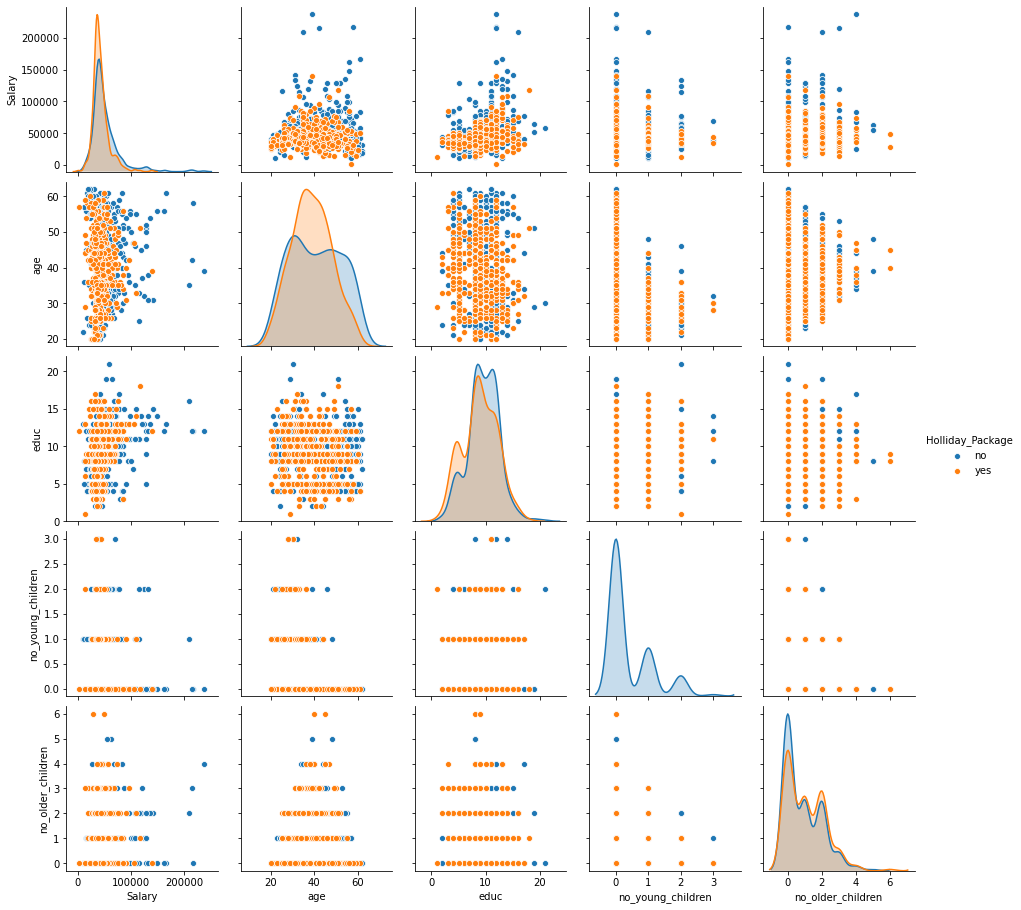

In [133]:
# Pairplot using sns
sns.pairplot(data,diag_kind='kde',hue='Holliday_Package');

In [25]:
for feature in data.columns: 
    if data[feature].dtype == 'object': 
        print('\n')
        print('feature:',feature)
        print(pd.Categorical(data[feature].unique()))
        print(pd.Categorical(data[feature].unique()).codes)
        data[feature] = pd.Categorical(data[feature]).codes



feature: Holliday_Package
[no, yes]
Categories (2, object): [no, yes]
[0 1]


feature: foreign
[no, yes]
Categories (2, object): [no, yes]
[0 1]


In [350]:
data.head()

,Holliday_Package,Salary,age,educ,no_young_children,no_older_children,foreign
0,0,48412,30,8,1,1,0
1,1,37207,45,8,0,1,0
2,0,58022,46,9,0,0,0
3,0,66503,31,11,2,0,0
4,0,66734,44,12,0,2,0


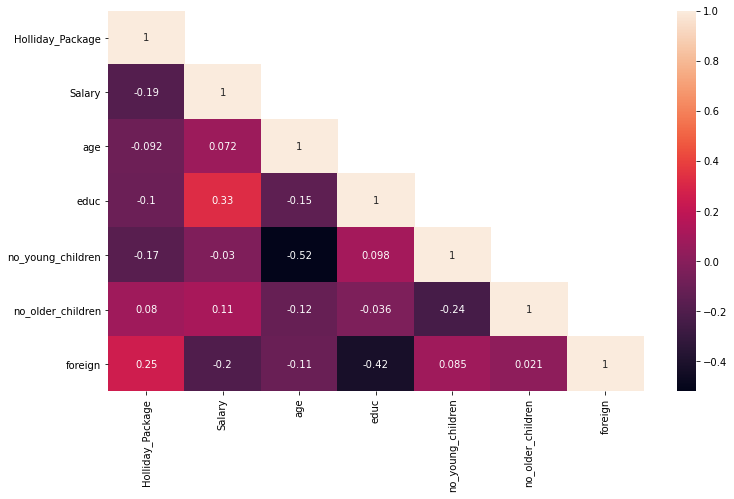

In [26]:
plt.figure(figsize=(12,7))
sns.heatmap(data.corr(), annot=True,mask=np.triu(data.corr(),+1));

**Variance Inflation Factor (VIF): Checking for Multicollinearity**

In [27]:
data.columns

Index(['Holliday_Package', 'Salary', 'age', 'educ', 'no_young_children',
       'no_older_children', 'foreign'],
      dtype='object')

In [28]:
import statsmodels.formula.api as sm

In [29]:
Z = data[['Holliday_Package', 'Salary', 'age', 'educ', 'no_young_children',
       'no_older_children', 'foreign']]

In [30]:
def vif_cal(Z):
    x_var =Z
    xvar_names = Z.columns
    vif = pd.DataFrame()
    for i in range(0, xvar_names.shape[0]):
        y=x_var[xvar_names[i]]
        x = x_var[xvar_names.drop(xvar_names[i])]
        rsq =sm.ols(formula ="y~x", data =x_var).fit().rsquared
        vif = round(1/(1-rsq),2)
        print(xvar_names[i], 'VIF = ', vif)

In [31]:
vif_cal(Z = data[['Holliday_Package', 'Salary', 'age', 'educ', 'no_young_children',
       'no_older_children', 'foreign']])

Holliday_Package VIF =  1.19
Salary VIF =  1.2
age VIF =  1.63
educ VIF =  1.41
no_young_children VIF =  1.69
no_older_children VIF =  1.19
foreign VIF =  1.34


### Splitting the data

**Train Test Split**

In [32]:
# Copy all the predictor variables into X dataframe
X = data.drop('Holliday_Package', axis=1)

# Copy target into the y dataframe. 
y = data['Holliday_Package']

In [33]:
# Split X and y into training and test set in 70:30 ratio
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30 , random_state=1,stratify=y)

In [34]:
y_train.value_counts(1)

0    0.539344
1    0.460656
Name: Holliday_Package, dtype: float64

In [35]:
y_test.value_counts(1)

0    0.541985
1    0.458015
Name: Holliday_Package, dtype: float64

In [36]:
print('Number of rows and columns of the training set for the independent variables:',X_train.shape)
print('Number of rows and columns of the training set for the dependent variable:',y_train.shape)
print('Number of rows and columns of the test set for the independent variables:',X_test.shape)
print('Number of rows and columns of the test set for the dependent variable:',y_test.shape)

Number of rows and columns of the training set for the independent variables: (610, 6)
Number of rows and columns of the training set for the dependent variable: (610,)
Number of rows and columns of the test set for the independent variables: (262, 6)
Number of rows and columns of the test set for the dependent variable: (262,)


### Logistic Regression Model

In [37]:
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
from sklearn.metrics import roc_auc_score,roc_curve,classification_report,confusion_matrix,plot_confusion_matrix

In [38]:
# Fit the Logistic Regression model
model = LogisticRegression(solver='newton-cg',max_iter=10000,penalty='none',verbose=True,n_jobs=2)
model.fit(X_train, y_train)

[Parallel(n_jobs=2)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=2)]: Done   1 out of   1 | elapsed:    1.7s finished


LogisticRegression(max_iter=10000, n_jobs=2, penalty='none', solver='newton-cg',
                   verbose=True)

**Predicting on Training and Test dataset**

In [39]:
ytrain_predict = model.predict(X_train)
ytest_predict = model.predict(X_test)

**Getting the Predicted Classes and Probs**

In [40]:
ytest_predict_prob=model.predict_proba(X_test)
pd.DataFrame(ytest_predict_prob).head()

,0,1
0,0.685349,0.314651
1,0.539469,0.460531
2,0.697042,0.302958
3,0.496348,0.503652
4,0.557723,0.442277


**Model Evaluation**

In [151]:
# Accuracy - Training Data
model.score(X_train, y_train)

0.6672131147540984

**AUC and ROC for the training data**

AUC: 0.735


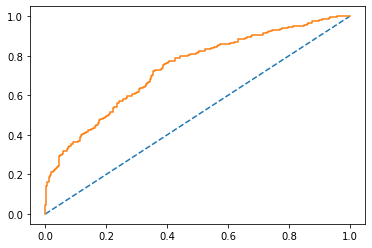

In [41]:
# predict probabilities
probs = model.predict_proba(X_train)
# keep probabilities for the positive outcome only
probs = probs[:, 1]
# calculate AUC
auc = roc_auc_score(y_train, probs)
print('AUC: %.3f' % auc)
# calculate roc curve
train_fpr, train_tpr, train_thresholds = roc_curve(y_train, probs)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(train_fpr, train_tpr);

In [45]:
# Accuracy - Test Data
model.score(X_test, y_test)

0.6526717557251909

AUC: 0.717


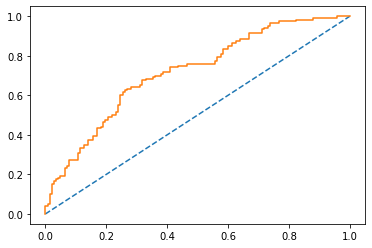

In [58]:

# predict probabilities
probs = model.predict_proba(X_test)
# keep probabilities for the positive outcome only
probs = probs[:, 1]
# calculate AUC
auc = roc_auc_score(y_test, probs)
print('AUC: %.3f' % auc)
# calculate roc curve
test_fpr, test_tpr, test_thresholds = roc_curve(y_test, probs)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(test_fpr, test_tpr);

**ROC curve comparision**

AUC for the Training Data: 0.735
AUC for the Testing Data: 0.717


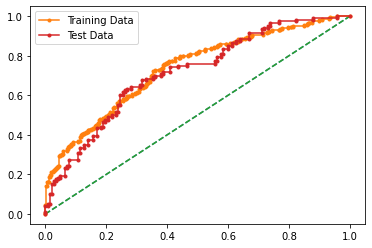

In [59]:
# ROC for the training data

# predict probabilities
probs = model.predict_proba(X_train)
# keep probabilities for the positive outcome only
probs = probs[:, 1]

auc = roc_auc_score(y_train, probs)
print('AUC for the Training Data: %.3f' % auc)

# calculate roc curve
train_fpr, train_tpr, train_thresholds = roc_curve(y_train, probs)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(train_fpr, train_tpr, marker='.',label = 'Training Data');



# ROC for the test data

# predict probabilities
probs = model.predict_proba(X_test)
# keep probabilities for the positive outcome only
probs = probs[:, 1]

auc = roc_auc_score(y_test, probs)
print('AUC for the Testing Data: %.3f' % auc)

# calculate roc curve
test_fpr, test_tpr, test_thresholds = roc_curve(y_test, probs)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(test_fpr, test_tpr, marker='.',label='Test Data');
# show the plot
plt.legend(loc='best')
plt.show()





**Confusion Matrix for the training data**

In [157]:
confusion_matrix(y_train, ytrain_predict)

array([[244,  85],
       [118, 163]], dtype=int64)

**Confusion Matrix for test data**

In [160]:
confusion_matrix(y_test, ytest_predict)

array([[109,  33],
       [ 58,  62]], dtype=int64)

**Training Data and Test Data Confusion matrix Comparison**

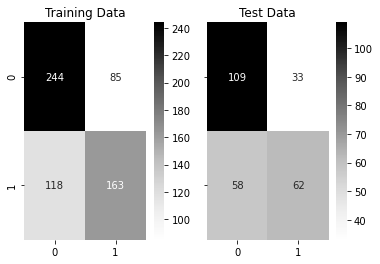

In [50]:
f,a =  plt.subplots(1,2,sharex=True,sharey=True,squeeze=False)

#Plotting confusion matrix for the different models for the Training Data

plot_0 = sns.heatmap((metrics.confusion_matrix(y_train, ytrain_predict)),annot=True,fmt='.5g',cmap='Greys',ax=a[0][0]);
a[0][0].set_title('Training Data')

plot_1 = sns.heatmap((metrics.confusion_matrix(y_test, ytest_predict)),annot=True,fmt='.5g',cmap='Greys',ax=a[0][1]);
a[0][1].set_title('Test Data');


**Training Data and Test Data Classification Report Comparison**

In [49]:
print('Classification Report of the training data:\n\n',metrics.classification_report(y_train, ytrain_predict),'\n')
print('Classification Report of the test data:\n\n',metrics.classification_report(y_test, ytest_predict),'\n')

Classification Report of the training data:

               precision    recall  f1-score   support

           0       0.67      0.74      0.71       329
           1       0.66      0.58      0.62       281

    accuracy                           0.67       610
   macro avg       0.67      0.66      0.66       610
weighted avg       0.67      0.67      0.66       610
 

Classification Report of the test data:

               precision    recall  f1-score   support

           0       0.65      0.77      0.71       142
           1       0.65      0.52      0.58       120

    accuracy                           0.65       262
   macro avg       0.65      0.64      0.64       262
weighted avg       0.65      0.65      0.65       262
 



In [60]:
import statsmodels.formula.api as sm

In [61]:
A1 = 'Holliday_Package~Salary+age+educ+no_young_children+no_older_children+foreign'

In [62]:
model = sm.logit(formula =A1, data =data).fit()
model.summary()

Optimization terminated successfully.
         Current function value: 0.601531
         Iterations 6


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:       Holliday_Package   No. Observations:                  872
Model:                          Logit   Df Residuals:                      865
Method:                           MLE   Df Model:                            6
Date:                Tue, 16 Feb 2021   Pseudo R-squ.:                  0.1281
Time:                        22:55:14   Log-Likelihood:                -524.53
converged:                       True   LL-Null:                       -601.61
Covariance Type:            nonrobust   LLR p-value:                 1.023e-30
=====================================================================================
                        coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------
Intercept             2.3259      0.554      4.199      0.000       1.240       3.411
Salary            -1.814e-05   4.35e-06     -4.169      0.000   -2.67e-05   -9.61e-06
age                  -0.0482      0.009     -5.314      0.000      -0.066      -0.030
educ                  0.0392      0.029      1.337      0.181      -0.018       0.097
no_young_children    -1.3173      0.180     -7.326      0.000      -1.670      -0.965
no_older_children    -0.0204      0.074     -0.276      0.782      -0.165       0.124
foreign               1.3216      0.200      6.601      0.000       0.929       1.714
=====================================================================================
"""

**-----------------------------**

### LDA Model

In [182]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn import metrics,model_selection
from sklearn.preprocessing import scale

In [185]:
X = data.drop('Holliday_Package',axis=1)
Y = data.pop('Holliday_Package')

In [186]:
X_train,X_test,Y_train,Y_test = model_selection.train_test_split(X,Y,test_size=0.30,random_state=1,stratify = Y)

In [187]:
#Build LDA Model
clf = LinearDiscriminantAnalysis()
model=clf.fit(X_train,Y_train)

In [188]:
#prediction

# Training Data Class Prediction with a cut-off value of 0.5
pred_class_train = model.predict(X_train)

# Test Data Class Prediction with a cut-off value of 0.5
pred_class_test = model.predict(X_test)

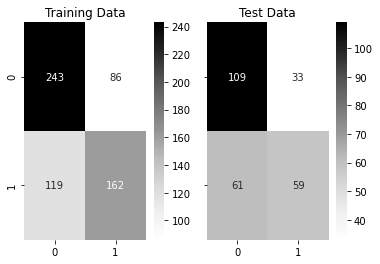

In [189]:
# Training Data and Test Data Confusion Matrix Comparison

f,a =  plt.subplots(1,2,sharex=True,sharey=True,squeeze=False)

#Plotting confusion matrix for the different models for the Training Data

plot_0 = sns.heatmap((metrics.confusion_matrix(Y_train,pred_class_train)),annot=True,fmt='.5g',cmap='Greys',ax=a[0][0]);
a[0][0].set_title('Training Data')

plot_1 = sns.heatmap((metrics.confusion_matrix(Y_test,pred_class_test)),annot=True,fmt='.5g',cmap='Greys',ax=a[0][1]);
a[0][1].set_title('Test Data');

In [190]:
# Training Data and Test Data Classification Report Comparison

print('Classification Report of the training data:\n\n',metrics.classification_report(Y_train,pred_class_train),'\n')
print('Classification Report of the test data:\n\n',metrics.classification_report(Y_test,pred_class_test),'\n')

Classification Report of the training data:

               precision    recall  f1-score   support

           0       0.67      0.74      0.70       329
           1       0.65      0.58      0.61       281

    accuracy                           0.66       610
   macro avg       0.66      0.66      0.66       610
weighted avg       0.66      0.66      0.66       610
 

Classification Report of the test data:

               precision    recall  f1-score   support

           0       0.64      0.77      0.70       142
           1       0.64      0.49      0.56       120

    accuracy                           0.64       262
   macro avg       0.64      0.63      0.63       262
weighted avg       0.64      0.64      0.63       262
 



In [191]:
# Probability prediction for the training and test data

# Training Data Probability Prediction
pred_prob_train = model.predict_proba(X_train)

# Test Data Probability Prediction
pred_prob_test = model.predict_proba(X_test)

In [192]:
pred_prob_train[:,1]

array([0.7381512 , 0.28961707, 0.38234291, 0.76483486, 0.46682945,
       0.44346246, 0.37680169, 0.30948321, 0.61081614, 0.64208316,
       0.25213217, 0.26469615, 0.39923017, 0.04631524, 0.23022974,
       0.36249565, 0.53701148, 0.33367574, 0.63047975, 0.62551868,
       0.62038047, 0.26045898, 0.8778445 , 0.33010529, 0.09907975,
       0.83197262, 0.20726445, 0.7448485 , 0.52475576, 0.18602064,
       0.34007289, 0.32707499, 0.37873484, 0.42874061, 0.31084381,
       0.28746402, 0.11553843, 0.53094637, 0.47040748, 0.22122639,
       0.26026817, 0.80975365, 0.51459465, 0.74029285, 0.79737631,
       0.40099878, 0.298335  , 0.93065406, 0.44451279, 0.70660174,
       0.75490574, 0.46875931, 0.77220783, 0.37565531, 0.22661608,
       0.74188557, 0.26237721, 0.5247693 , 0.6721239 , 0.34088095,
       0.62335813, 0.57741879, 0.54295979, 0.45085985, 0.56389786,
       0.5965561 , 0.12149134, 0.57410954, 0.3890238 , 0.26157228,
       0.35655665, 0.7429183 , 0.76617151, 0.22742495, 0.42898

AUC for the Training Data: 0.733
AUC for the Test Data: 0.714


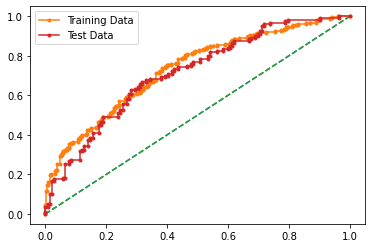

In [193]:
# AUC and ROC for the training data

# calculate AUC
auc = metrics.roc_auc_score(Y_train,pred_prob_train[:,1])
print('AUC for the Training Data: %.3f' % auc)

#  calculate roc curve
fpr, tpr, thresholds = metrics.roc_curve(Y_train,pred_prob_train[:,1])
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(fpr, tpr, marker='.',label = 'Training Data')


# AUC and ROC for the test data

# calculate AUC
auc = metrics.roc_auc_score(Y_test,pred_prob_test[:,1])
print('AUC for the Test Data: %.3f' % auc)

#  calculate roc curve
fpr, tpr, thresholds = metrics.roc_curve(Y_test,pred_prob_test[:,1])
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(fpr, tpr, marker='.',label='Test Data')
# show the plot
plt.legend(loc='best')
plt.show()

## -----------End------------

### modeling with outlier treatment

In [362]:
data2=data
data2.head()

,Holliday_Package,Salary,age,educ,no_young_children,no_older_children,foreign
0,0,48412,30,8,1,1,0
1,1,37207,45,8,0,1,0
2,0,58022,46,9,0,0,0
3,0,66503,31,11,2,0,0
4,0,66734,44,12,0,2,0


Shape before Outliers Treatment (872, 7)


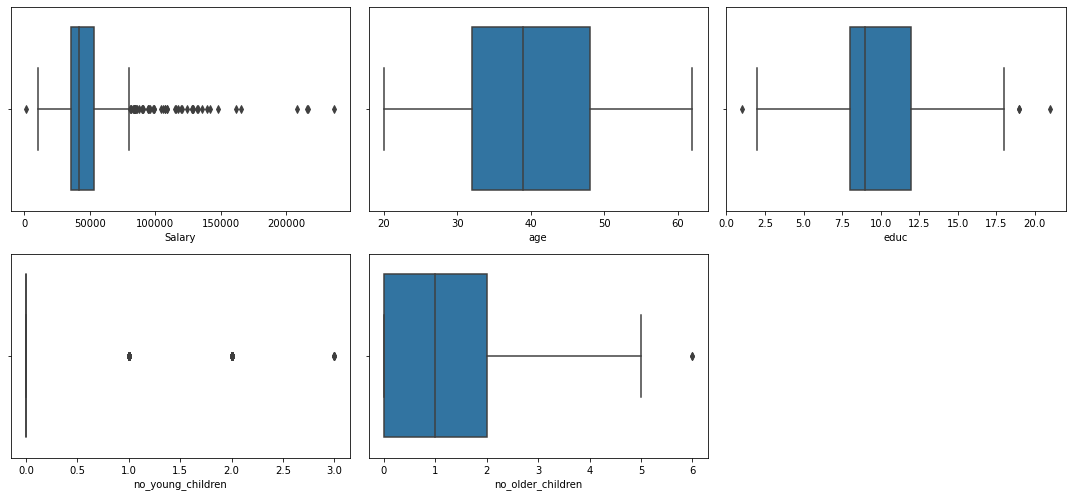

In [365]:
data_plot=data2[['Salary','age','educ','no_young_children','no_older_children']]
fig=plt.figure(figsize=(15,10));
for i in range(0,len(data_plot.columns)):
    ax=fig.add_subplot(3,3,i+1)
    sns.boxplot(data_plot[data_plot.columns[i]])
    plt.tight_layout()
print('Shape before Outliers Treatment',data2.shape)

In [370]:
#remove outliers
var = ['Salary','educ']
for i in range(0,2):
    lr,ur = remove_outlier(data2[var[i]])
    data2[var[i]] =np.where(data2[var[i]]>ur,ur,data2[var[i]])
    data2[var[i]] =np.where(data2[var[i]]<lr,lr,data2[var[i]])

Shape after Outliers Treatment (872, 7)


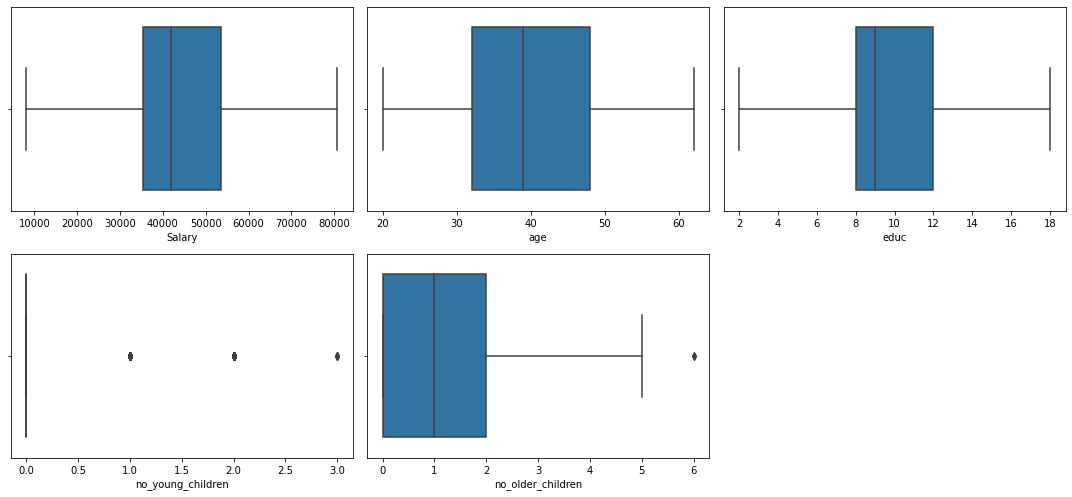

In [371]:
data_plot=data2[['Salary','age','educ','no_young_children','no_older_children']]
fig=plt.figure(figsize=(15,10));
for i in range(0,len(data_plot.columns)):
    ax=fig.add_subplot(3,3,i+1)
    sns.boxplot(data_plot[data_plot.columns[i]])
    plt.tight_layout()
print('Shape after Outliers Treatment',data2.shape)

**Splitting the data**

In [372]:
# Copy all the predictor variables into X dataframe
X2 = data2.drop('Holliday_Package', axis=1)

# Copy target into the y dataframe. 
Y2 = data2['Holliday_Package']

In [374]:
# Split X and y into training and test set in 70:30 ratio
X2_train, X2_test, Y2_train, Y2_test = train_test_split(X2, Y2, test_size=0.30 , random_state=1,stratify=Y)

In [376]:
#Logistic Regression Model
# Fit the Logistic Regression model

model_v2 = LogisticRegression(solver='newton-cg',max_iter=10000,penalty='none',verbose=True,n_jobs=2)
model_v2.fit(X2_train, Y2_train)

[Parallel(n_jobs=2)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=2)]: Done   1 out of   1 | elapsed:    4.3s finished


LogisticRegression(max_iter=10000, n_jobs=2, penalty='none', solver='newton-cg',
                   verbose=True)

In [379]:
Y2train_predict = model_v2.predict(X2_train)
Y2test_predict = model_v2.predict(X2_test)

In [381]:
Y2test_predict_prob=model_v2.predict_proba(X2_test)
pd.DataFrame(Y2test_predict_prob).head()

,0,1
0,0.677959,0.322041
1,0.535239,0.464761
2,0.692009,0.307991
3,0.489946,0.510054
4,0.571862,0.428138


In [383]:
# Accuracy - Training Data
model_v2.score(X2_train, Y2_train)

0.6672131147540984

AUC: 0.733


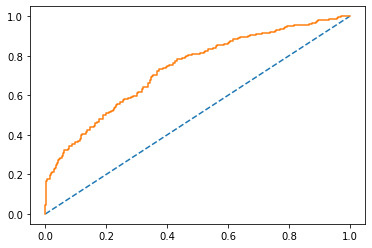

In [385]:
# AOC & ROC curve

# predict probabilities
probs = model_v2.predict_proba(X2_train)
# keep probabilities for the positive outcome only
probs = probs[:, 1]
# calculate AUC
auc = roc_auc_score(Y2_train, probs)
print('AUC: %.3f' % auc)
# calculate roc curve
train_fpr, train_tpr, train_thresholds = roc_curve(Y2_train, probs)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(train_fpr, train_tpr);

In [386]:
# Accuracy - Test Data
model_v2.score(X2_test, Y2_test)

0.648854961832061

AUC: 0.715


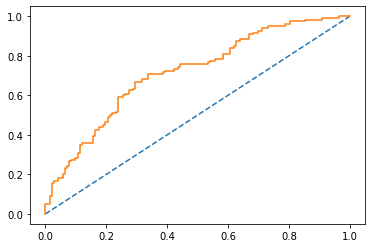

In [388]:
#AOC & ROC on testing data

# predict probabilities
probs = model_v2.predict_proba(X2_test)
# keep probabilities for the positive outcome only
probs = probs[:, 1]
# calculate AUC
auc = roc_auc_score(Y2_test, probs)
print('AUC: %.3f' % auc)
# calculate roc curve
test_fpr, test_tpr, test_thresholds = roc_curve(Y2_test, probs)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(test_fpr, test_tpr);

In [392]:
# Confusion Matrix and data classification for train dataset

confusion_matrix(Y2_train, Y2train_predict)

array([[244,  85],
       [118, 163]], dtype=int64)

In [393]:
print(classification_report(Y2_train, Y2train_predict))

              precision    recall  f1-score   support

           0       0.67      0.74      0.71       329
           1       0.66      0.58      0.62       281

    accuracy                           0.67       610
   macro avg       0.67      0.66      0.66       610
weighted avg       0.67      0.67      0.66       610



In [394]:
# Confusion Matrix and data classification for test dataset

confusion_matrix(Y2_test, Y2test_predict)

array([[108,  34],
       [ 58,  62]], dtype=int64)

In [395]:
print(classification_report(Y2_test, Y2test_predict))

              precision    recall  f1-score   support

           0       0.65      0.76      0.70       142
           1       0.65      0.52      0.57       120

    accuracy                           0.65       262
   macro avg       0.65      0.64      0.64       262
weighted avg       0.65      0.65      0.64       262



With outlier treatment the accuracy is bit better than earlier